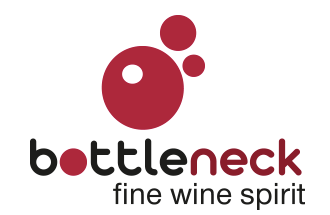


In [1]:
# import librairies needed for project
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

# Étape 1 - Import des données et vérification du typage des colonnes

In [2]:
# import data files
erp = pd.read_csv('erp.csv', encoding='latin-1')
liaison = pd.read_csv('liaison.csv', encoding='latin-1')
web = pd.read_csv('web.csv', encoding='latin-1')

In [3]:
# display erp file info
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
# display first 5 lines of erp file
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
# rename columns
erp.rename(columns={'product_id': 'product_id_erp'}, inplace=True)

In [6]:
# type casting
erp['product_id_erp'] = erp['product_id_erp'].astype('string')
erp['onsale_web'] = erp['onsale_web'].astype('bool')
erp['stock_status'] = erp['stock_status'].astype('string')

In [7]:
# display liaison file info
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  825 non-null    int64  
 1   id_web      731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.0 KB


In [8]:
# display first 5 lines of liaison file
liaison.head()

,product_id,id_web
0,3847,15298.0
1,3849,15296.0
2,3850,15300.0
3,4032,19814.0
4,4039,19815.0


In [9]:
# rename columns
liaison.rename(columns={'product_id': 'product_id_liaison', 'id_web':
                        'sku_liaison'}, inplace=True)

In [10]:
# type casting
liaison['product_id_liaison'] = liaison['product_id_liaison'].astype('string')
liaison['sku_liaison'] = liaison['sku_liaison'].astype('string')

In [11]:
# display first 5 lines of liaison file
liaison.head()

,product_id_liaison,sku_liaison
0,3847,15298.0
1,3849,15296.0
2,3850,15300.0
3,4032,19814.0
4,4039,19815.0


In [12]:
# remove '.0' characters to the right of sku_liaison strings
liaison['sku_liaison'] = liaison.sku_liaison.str[:5]

In [13]:
# display web file info
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [14]:
# display first 5 lines of web file
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,01/06/2018 13:53,...,bon-cadeau-de-25-euros,01/06/2018 14:13,01/06/2018 12:13,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,08/02/2018 12:58,...,pierre-jean-villa-saint-joseph-preface-2018,30/12/2019 09:30,30/12/2019 08:30,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,08/02/2018 13:49,...,pierre-jean-villa-saint-joseph-tilde-2017,21/12/2019 09:00,21/12/2019 08:00,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,08/02/2018 14:08,...,pierre-jean-villa-croze-hermitage-accroche-coe...,26/06/2020 18:15,26/06/2020 16:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,09/02/2018 14:01,...,pierre-jean-villa-igp-gamine-2018,04/01/2020 16:36,04/01/2020 15:36,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [15]:
# rename columns
web.rename(columns={'sku': 'sku_web'}, inplace=True)

In [16]:
# type casting
web['sku_web'] = web['sku_web'].astype('string')
web['post_type'] = web['post_type'].astype('string')
web['post_name'] = web['post_name'].astype('string')
web['guid'] = web['guid'].astype('string')
web['tax_status'] = web['tax_status'].astype('string')

In [17]:
# check for incomplete product references
p_id = liaison.loc[(liaison['product_id_liaison'].isna() == False)]['product_id_liaison'].count()
w_id = liaison.loc[(liaison['sku_liaison'].isna() == False)]['sku_liaison'].count()
print(p_id,"références produit uniques sont présentes dans le fichier de liaison.")
print((p_id - w_id), "de ces références n'ont pas de référence produit web correspondante : seules", w_id,"références \n "
      "produit web sont présentes. Ces références manquantes ne concernent-elles que des produits \n non-vendus en ligne,"
      " i.e. n'ayant pas de reference sku? Dans le cas contraire, le fichier de liaison est potentiellement incomplet.")

825 références produit uniques sont présentes dans le fichier de liaison.
94 de ces références n'ont pas de référence produit web correspondante : seules 731 références 
 produit web sont présentes. Ces références manquantes ne concernent-elles que des produits 
 non-vendus en ligne, i.e. n'ayant pas de reference sku? Dans le cas contraire, le fichier de liaison est potentiellement incomplet.


In [18]:
# print unique web product references in web file
print(len(web['sku_web'].unique()), "références produit web uniques sont "
      "présentes dans le fichier web.")

715 références produit web uniques sont présentes dans le fichier web.


In [19]:
# print unique references in erp file
online_product = erp.loc[(erp['onsale_web'] == True)].shape[0]
offline_product = erp.loc[(erp['onsale_web'] == False)].shape[0]
print(len(erp['product_id_erp'].unique()), "références produit uniques "
      "sont présentes dans le fichier erp, dont",
      online_product,"sont indiquées comme etant vendues en ligne et",
     offline_product,"sont indiquées comme etant vendues offline.")

825 références produit uniques sont présentes dans le fichier erp, dont 717 sont indiquées comme etant vendues en ligne et 108 sont indiquées comme etant vendues offline.


### Les nombres de références produit uniques varient entre les 3 fichiers, ce qu'il faudra vérifier et résoudre.

# Étape 2 - Étude de la qualité des données, duplicatas, imputations, suppressions d'indicateurs

## 2.1 - Identification, analyse & suppression des doublons¶

In [20]:
# check for duplicates
print(erp.duplicated(subset=None, keep='first').sum(), "doublons dans la table erp.")
print(liaison.duplicated(subset=None, keep='first').sum(), "doublons dans la table liaison.")
print(web.duplicated(subset=None, keep='first').sum(), "doublons dans la table web.")

0 doublons dans la table erp.
0 doublons dans la table liaison.
82 doublons dans la table web.


In [21]:
# check duplicates in web table
web_dup = web[web[['sku_web', 'virtual', 'downloadable','rating_count','average_rating',
                   'total_sales','tax_status','tax_class','post_author','post_date','post_date_gmt',
                   'post_content','post_title','post_name','post_excerpt','post_status','comment_status',
                   'ping_status','post_password','post_name','post_modified','post_modified_gmt',
                   'post_content_filtered','post_parent','guid', 'menu_order','post_type',
                   'post_mime_type','comment_count']].duplicated() == True]
web_dup.head(41)

,sku_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
227,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
230,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
231,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
233,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
237,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
283,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
309,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
310,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
311,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN


In [22]:
web_dup.tail(41)

,sku_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
750,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
751,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
752,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
753,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
754,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
755,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
756,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
757,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
758,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
763,<NA>,0,0,0,NaN,NaN,<NA>,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN


### Les lignes dupliquées dans le fichier web ne contiennent que des NaN, des cellules vides ou des zéros, on peut donc les supprimer. Il n'y a pas de doublons dans les tables erp et liaison.

In [23]:
# remove duplicates
web = web.drop_duplicates()

## 2.2 - Identification des valeurs manquantes

<AxesSubplot:>

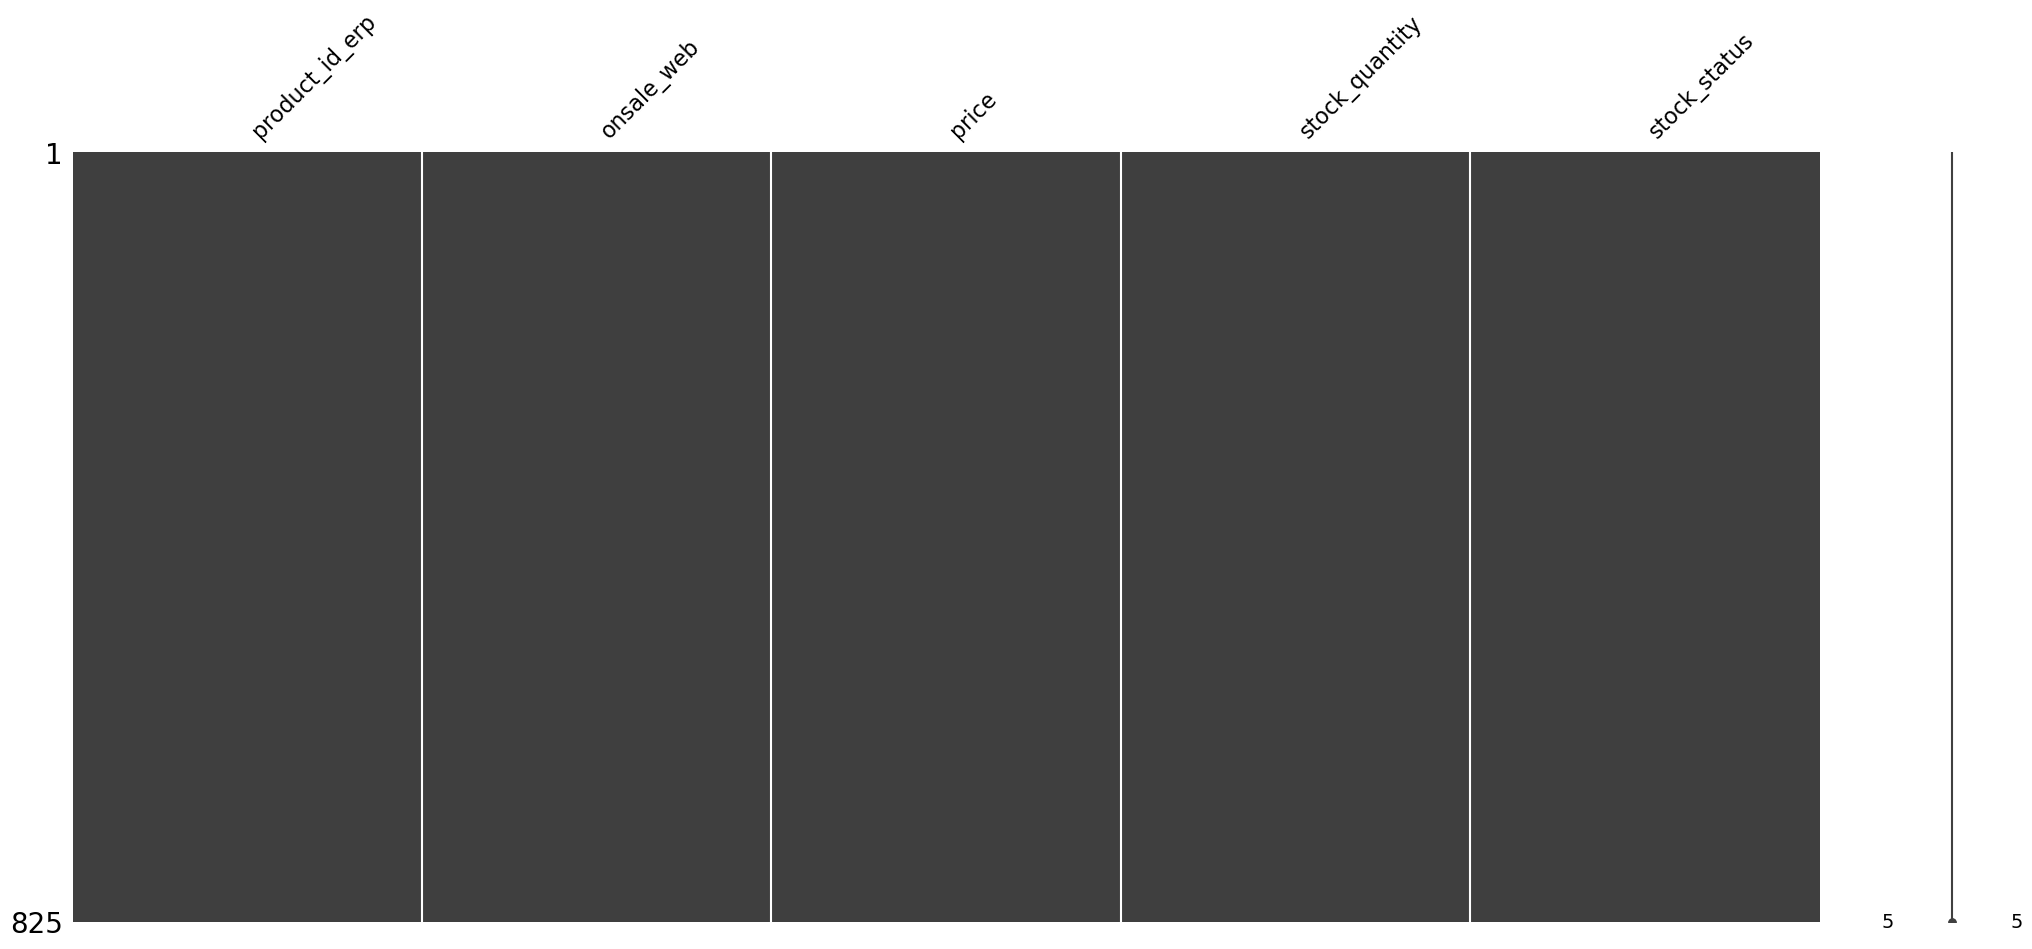

In [24]:
# check for missing data
msno.matrix(erp)

### La table erp ne semble pas comporter de valeurs manquantes.

<AxesSubplot:>

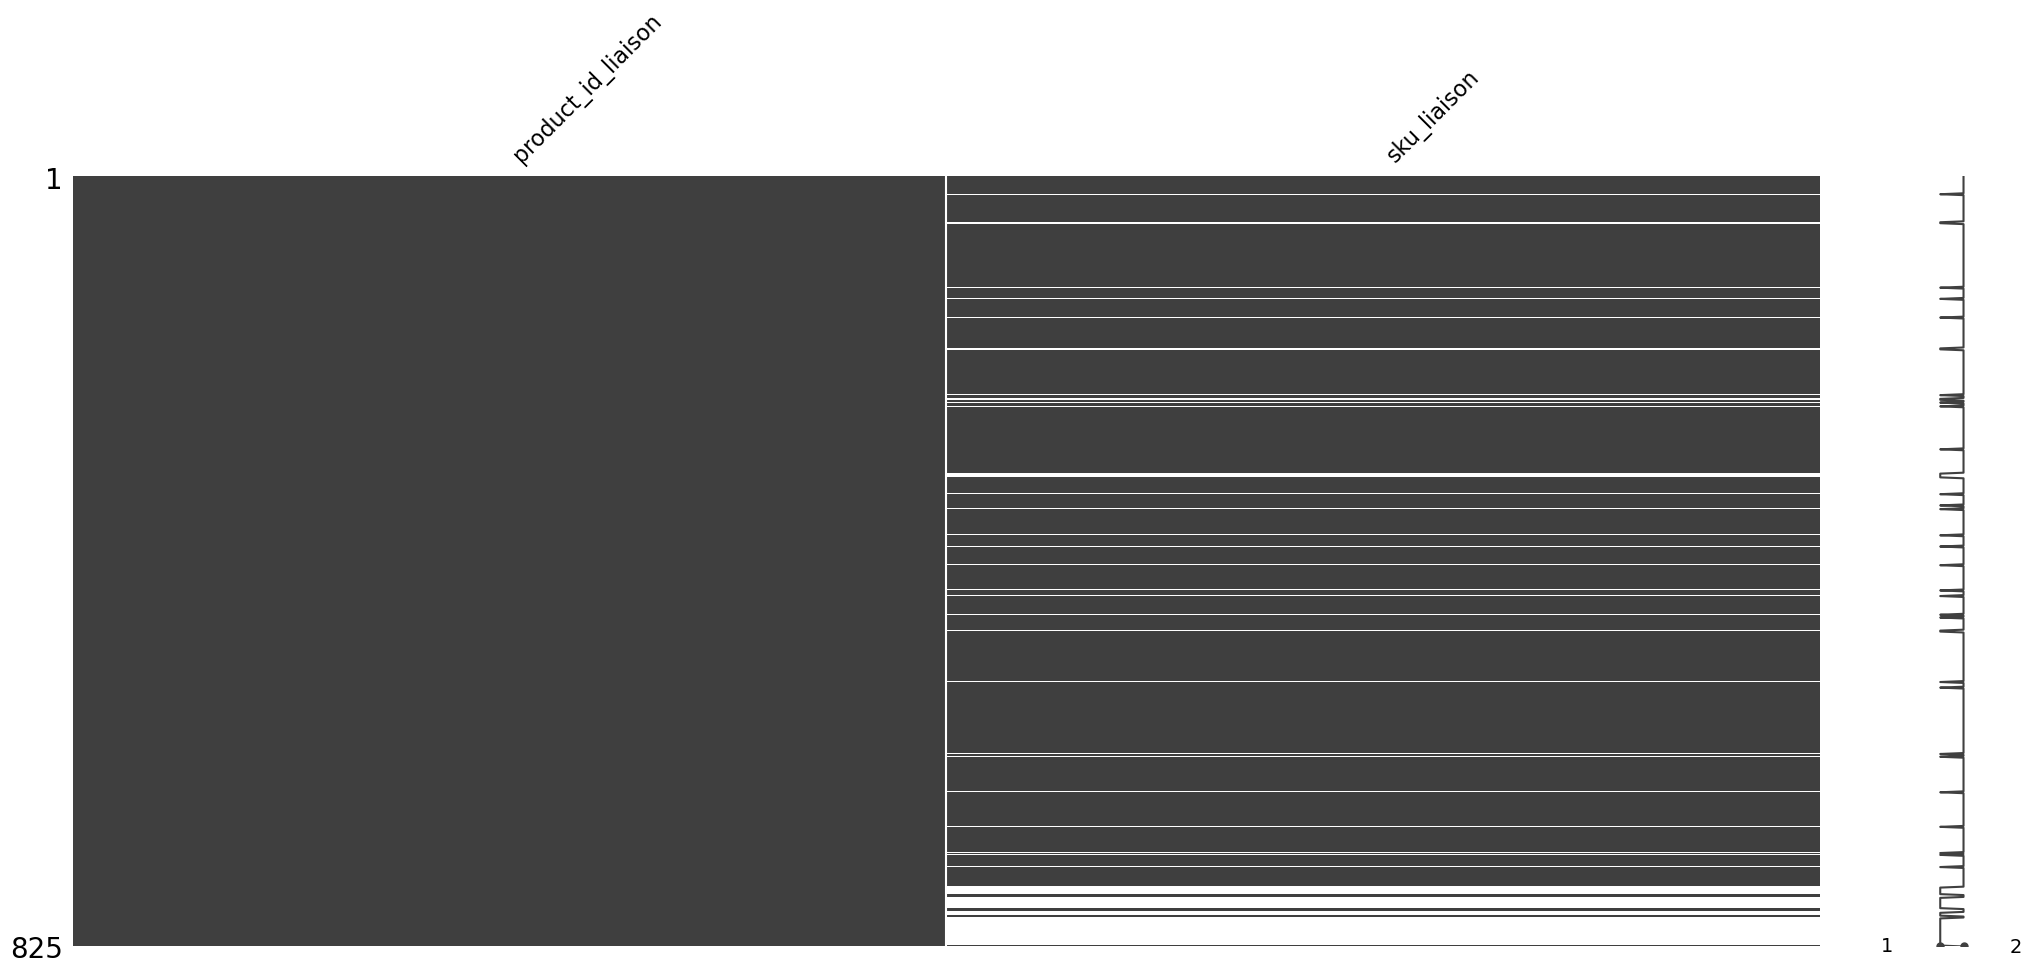

In [25]:
# check for missing data
msno.matrix(liaison)

### Le fichier liaison comporte un nombre significatif de references web manquantes.

<AxesSubplot:>

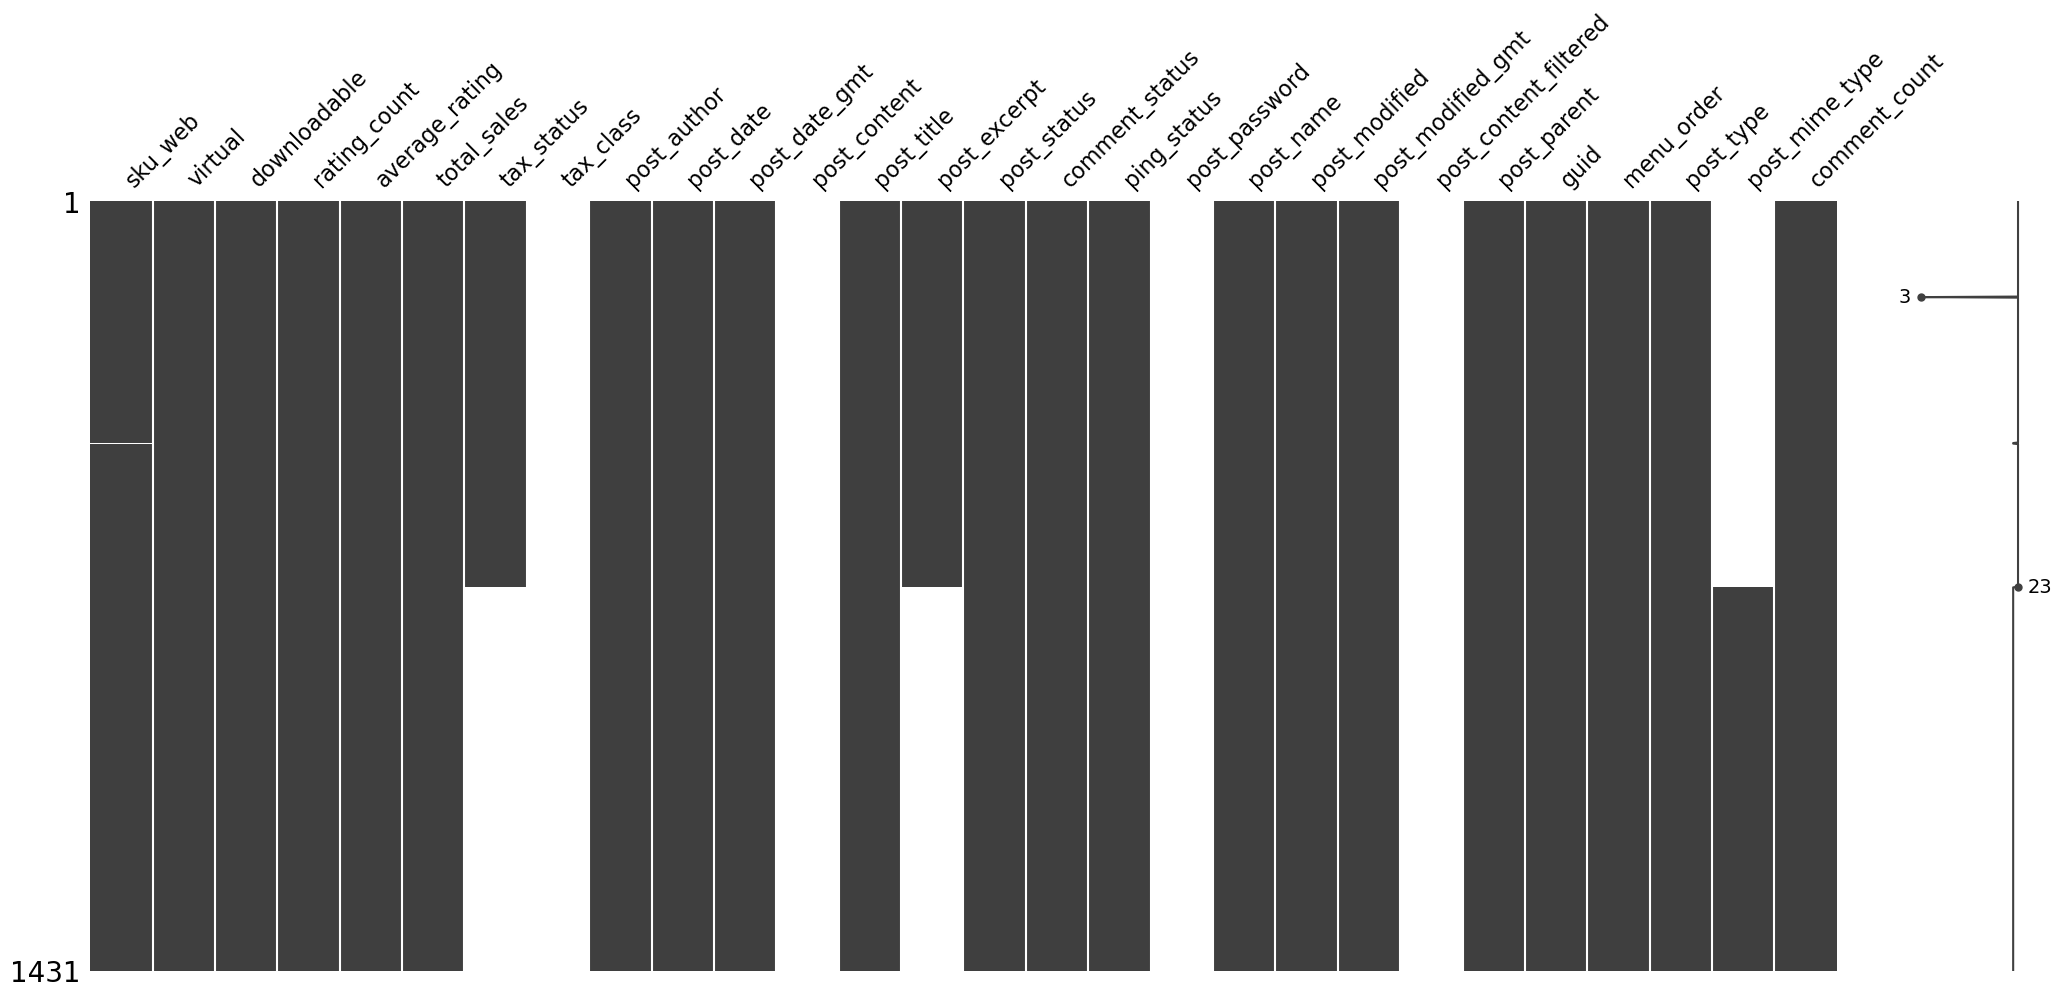

In [26]:
# check for missing data
msno.matrix(web)

### Le fichier web comporte des colonnes entièrement ou partiellement vides, ainsi que quelques autres valeurs manquantes.

## 2.3 - Suppression des lignes et des colonnes vides

In [27]:
# drop lines with all zeros
web_trim = web.loc[(web != 0).any(axis=1)]

# drop columns with all zeros
web_trim = web.dropna(how='all', axis=1)

<AxesSubplot:>

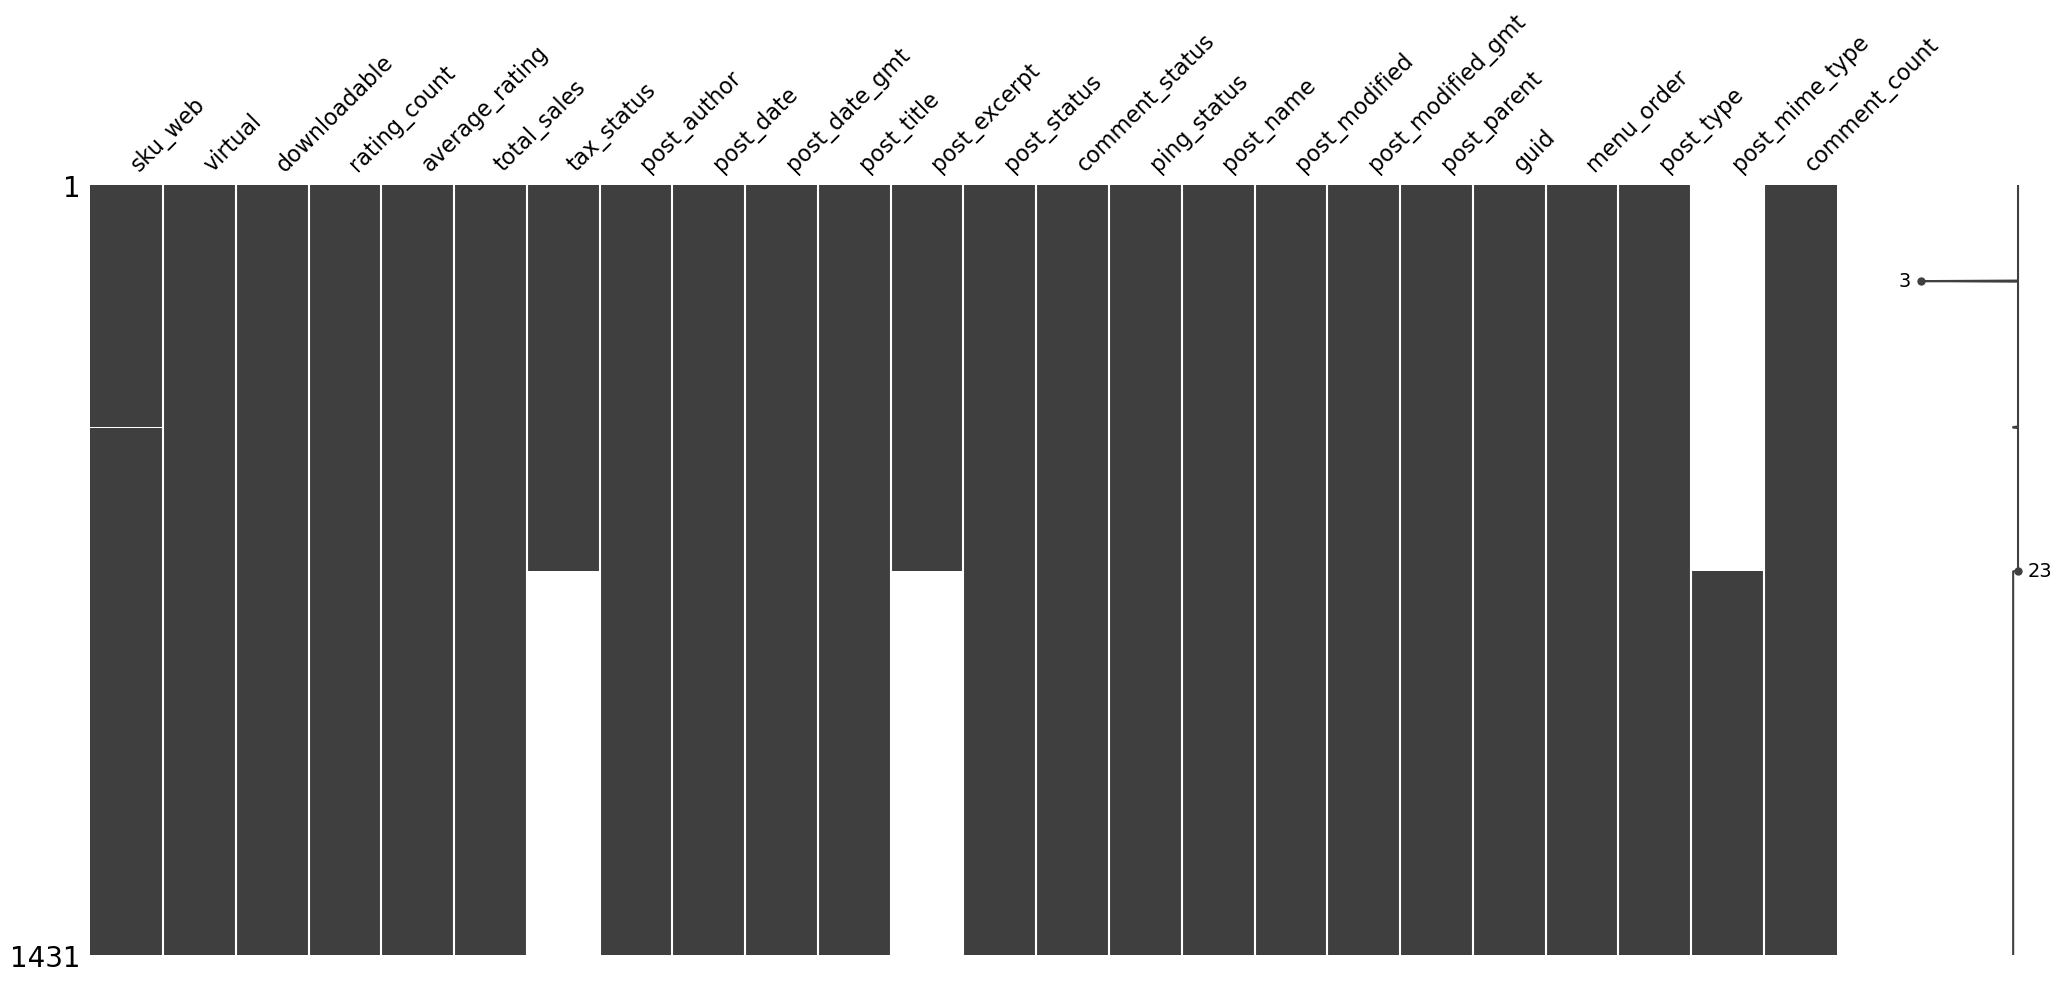

In [28]:
# check for missing data
msno.matrix(web_trim)

## 2.4 Vérification des clés primaires

In [29]:
# define function to find eligible keys in dataframe.
# Careful: use function only
# on dataframes with duplicated lines already checked & removed
def isCandKey(df, col):
    if df.shape[0] == len(df[col].unique()):
        print(str(col), "est une clé candidate.")
        return True
    else:
        print(col, "n'est pas une clé candidate.")
        return False

In [30]:
# check for candidate key in erp table
isCandKey(erp, 'product_id_erp')

product_id_erp est une clé candidate.


True

In [31]:
# check for candidate key in liaison table
isCandKey(liaison, 'product_id_liaison')

product_id_liaison est une clé candidate.


True

In [32]:
# check for candidate key in web table
isCandKey(web, 'sku_web')

sku_web n'est pas une clé candidate.


False

### Il y a donc des doublons dans la colonne sku_web. Cherchons si on peut lui adjoindre une autre colonne pour former la clé primaire, ou trouver un moyen d'éliminer ces doublons.

In [33]:
# check unique values in sku_web identifier
print(web['sku_web'].unique().shape[0],"identifiants sku_web uniques dans le fichier web. Liste: \n")
print(*web['sku_web'].unique())

715 identifiants sku_web uniques dans le fichier web. Liste: 

bon-cadeau-25-euros 15298 15296 15300 19814 19815 15303 14975 16042 14980 16041 15269 14977 16044 16043 16449 16045 16030 13127 19816 16029 16039 16318 16275 16498 16320 16319 15966 15022 15967 15490 16416 11862 15444 15953 12045 13074 15941 16069 13072 15440 13435 13078 13117 16296 16014 16462 16013 16180 15676 16120 15564 15675 15378 15813 13416 14905 15767 16505 15683 16504 15787 14800 15353 15382 15339 11668 13209 15341 13217 304 11641 1662 1360 15648 1364 7086 1366 15140 16238 16237 15141 14944 14941 14751 16093 15668 15373 15375 14474 15482 13453 15075 16124 15785 15784 15786 14332 16210 16211 16209 15629 15583 16160 16166 15783 16560 15747 15746 16190 16189 16265 16191 16263 15605 16529 15441 13032 16256 16322 16295 15656 15655 15415 15414 15413 16023 16024 15720 15714 15717 15718 15480 15213 15672 12599 15758 15829 15759 16585 15306 16497 15261 12657 15403 15461 16269 13905 16567 15436 14725 15310 15770 16097 15428 

In [34]:
# check unique values in post_mime_type column
web['post_mime_type'].unique()

array([nan, 'image/jpeg'], dtype=object)

In [35]:
# check unique values in post_type column
web['post_type'].unique()

<StringArray>
['product', <NA>, 'attachment']
Length: 3, dtype: string

### La source des duplicatas semble être la présence d'une photo pour chaque référence produit sur le site.
### Testons cette hypothese en excluant les lignes où le post_mime_type est une image et en ne gardant que les lignes ou le post_type est un produit.

In [36]:
# remove columns unnecessary for turnover analysis
web_trim = web.loc[(web['post_mime_type'] != 'image/jpeg')
                   & (web['post_type'] == 'product')][['sku_web',
                                                       'total_sales', 'post_name',
                                                       'guid', 'post_type']]

In [37]:
print("Il y a", web_trim.shape[0], "lignes restantes dans le fichier web.")

Il y a 716 lignes restantes dans le fichier web.


In [38]:
print("Sur ces", web_trim.shape[0], "lignes,", len(web_trim['sku_web'].unique()
                                                   ), "ont des identifiants "
                                                      "sku_web uniques.")

Sur ces 716 lignes, 715 ont des identifiants sku_web uniques.


In [39]:
# check for candidate key in web table
isCandKey(web_trim, 'sku_web')

sku_web n'est pas une clé candidate.


False

### Notre hypothèse n'est pas vérifiée, il reste des doublons dans la colonne sku_web même apres suppression des photos.
### Inspectons les autres colonnes pour rechercher une clé candidate.

In [40]:
# display single column to inspect data
web['post_name']

0                                  bon-cadeau-de-25-euros
1             pierre-jean-villa-saint-joseph-preface-2018
2               pierre-jean-villa-saint-joseph-tilde-2017
3       pierre-jean-villa-croze-hermitage-accroche-coe...
4                       pierre-jean-villa-igp-gamine-2018
                              ...                        
1508                      mouthes-le-bihan-aime-chai-2015
1509           camin-larredya-jurancon-sec-la-virada-2018
1510               jamet-cote-rotie-fructus-voluptas-2018
1511       clos-du-mont-olivet-chateauneuf-du-pape-2007-2
1512    domaine-saint-nicolas-fiefs-vendeens-blanc-les...
Name: post_name, Length: 1431, dtype: string

In [41]:
# display single column to inspect data
web['guid']

0       https://www.bottle-neck.fr/?post_type=product&...
1       https://www.bottle-neck.fr/?post_type=product&...
2       https://www.bottle-neck.fr/?post_type=product&...
3       https://www.bottle-neck.fr/?post_type=product&...
4       https://www.bottle-neck.fr/?post_type=product&...
                              ...                        
1508    https://www.bottle-neck.fr/wp-content/uploads/...
1509    https://www.bottle-neck.fr/wp-content/uploads/...
1510    https://www.bottle-neck.fr/wp-content/uploads/...
1511    https://www.bottle-neck.fr/wp-content/uploads/...
1512    https://www.bottle-neck.fr/wp-content/uploads/...
Name: guid, Length: 1431, dtype: string

In [42]:
# show full length of first 10 ['guid'] strings
for i in range(0, 10):
    print(web['guid'][i])

https://www.bottle-neck.fr/?post_type=product&#038;p=4954
https://www.bottle-neck.fr/?post_type=product&#038;p=3847
https://www.bottle-neck.fr/?post_type=product&#038;p=3849
https://www.bottle-neck.fr/?post_type=product&#038;p=3850
https://www.bottle-neck.fr/?post_type=product&#038;p=4032
https://www.bottle-neck.fr/?post_type=product&#038;p=4039
https://www.bottle-neck.fr/?post_type=product&#038;p=4040
https://www.bottle-neck.fr/?post_type=product&#038;p=4041
https://www.bottle-neck.fr/?post_type=product&#038;p=4042
https://www.bottle-neck.fr/?post_type=product&#038;p=4043


### Les chaînes de 4 caractères à droite des strings ['guid'] ressemblent aux références produit présentes dans le fichier de liaison. Vérifions si elles sont cohérentes dans tout le fichier et pourraient éventuellement constituer une clé candidate dans la table web.

In [43]:
# extract last 4 characters to the right of ['guid'] strings
web_trim['product_id_web'] = web_trim.guid.str[-4:]
web_trim.head()

,sku_web,total_sales,post_name,guid,post_type,product_id_web
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,product,4954
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,product,3847
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,product,3849
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,product,3850
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,product,4032


In [44]:
# check for candidate key in web_trim table
isCandKey(web_trim, 'product_id_web')

product_id_web est une clé candidate.


True

### Notre hypothèse est vérifiée - ['product_id_web'] est bien une clé candidate de la table web_trim. Vérifions si c'est le cas également dans la table web.

In [45]:
# extract last 4 characters to the right of ['guid'] strings
web['product_id_web'] = web.guid.str[-4:]
web.head()

,sku_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id_web
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,01/06/2018 13:53,...,01/06/2018 14:13,01/06/2018 12:13,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,08/02/2018 12:58,...,30/12/2019 09:30,30/12/2019 08:30,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,08/02/2018 13:49,...,21/12/2019 09:00,21/12/2019 08:00,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,08/02/2018 14:08,...,26/06/2020 18:15,26/06/2020 16:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,09/02/2018 14:01,...,04/01/2020 16:36,04/01/2020 15:36,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032


In [46]:
# check for candidate key in web table
isCandKey(web, 'product_id_web')

product_id_web n'est pas une clé candidate.


False

### Notre hypothèse n'est pas vérifiée. La référence product_id_web extraite du ['guid'] n'est donc une clé candidate que sur la table web retraitée i.e. sur la table web_trim où les références aux photos postées sur le site ont été retirées.
### Les clés primaires de nos tables sont donc:
### erp => product_id_erp
### web_trim => product_id_web
### Il n'est pas nécessaire d'utiliser la table liaison (par ailleurs incomplete et avec une erreur de nommage de colonne, qui met en doute la rigueur avec laquelle le fichier a été constitué).
### Poursuivons l'analyse des doublons sku_web dans la table web_trim.

In [47]:
# find duplicated sku_web identifier in remaining lines
web_trim_dup = web_trim.loc[(web_trim['sku_web'].duplicated() == True)]
web_trim_dup

,sku_web,total_sales,post_name,guid,post_type,product_id_web
471,<NA>,0.0,pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product,5075


In [48]:
# print product reference
print("L'identifiant produit du duplicata est: ",
      web_trim_dup.guid.str[-4:].values[0])

L'identifiant produit du duplicata est:  5075


### Il faudra investiguer pourquoi ce produit est dupliqué et pourquoi son sku_web est manquant dans le fichier web.
### Recherchons les autres sku_web manquants.

In [49]:
# find other products with missing sku_web references in web file
web_trim_nul = web_trim.loc[(web_trim['sku_web'].isnull() == True)]
web_trim_nul

,sku_web,total_sales,post_name,guid,post_type,product_id_web
470,<NA>,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&...,product,5070
471,<NA>,0.0,pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product,5075


In [50]:
# check if these products have references in the liaison file
liaison_2refs = liaison.loc[(liaison['product_id_liaison'] == '5070')
                            | (liaison['product_id_liaison'] == '5075')]
liaison_2refs

,product_id_liaison,sku_liaison
486,5070,<NA>
487,5075,<NA>


### Ces produits n'ont pas d'identifiant sku dans le fichier de liaison.

In [51]:
# check if these products are really meant to be sold on the website
erp_2refs = erp.loc[(erp['product_id_erp'] == '5070')
                    | (erp['product_id_erp'] == '5075')]
erp_2refs

,product_id_erp,onsale_web,price,stock_quantity,stock_status
486,5070,True,84.7,0,outofstock
487,5075,True,43.3,0,outofstock


### onsaleweb = True pour ces 2 produits donc a priori ils doivent bien etre présents sur le site.
### Ces produits ont un statut "out of stock" - cela a-t-il un impact sur l'absence de reference sku_web pour ces produits ou pour d'autres?

In [52]:
# identify list of products sold on the website according to the erp file but which are out-of-stock
erp_oos = erp.loc[(erp['onsale_web'] == True) & (erp['stock_status'] == 'outofstock')]
print(erp_oos.shape[0],"produits vendus en ligne sont out of stock. Liste des produits:")
erp_oos

143 produits vendus en ligne sont out of stock. Liste des produits:


,product_id_erp,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,outofstock
1,3849,True,34.3,0,outofstock
2,3850,True,20.8,0,outofstock
3,4032,True,14.1,0,outofstock
4,4039,True,46.0,0,outofstock
...,...,...,...,...,...
731,6570,True,29.2,0,outofstock
732,6572,True,44.0,0,outofstock
735,6578,True,40.0,0,outofstock
759,6751,True,46.5,0,outofstock


In [53]:
# identify unique product references in list of products
# sold on the website according to the erp file but which are out-of-stock
erp_oos['product_id_erp'].unique().shape[0]

143

### Il n'y a donc pas de doublons dans la colonne ['product_id_erp'] de la table erp_oos.

In [54]:
# list product references in list of products sold on the website
# according to the erp file but which are out-of-stock
print("Liste des identifiants des produits devant etre vendus sur le site mais qui sont out-of-stock:\n")
print(*erp_oos['product_id_erp'].unique())

Liste des identifiants des produits devant etre vendus sur le site mais qui sont out-of-stock:

3847 3849 3850 4032 4039 4040 4046 4050 4054 4056 4069 4079 4081 4083 4108 4130 4137 4138 4151 4153 4158 4159 4160 4161 4186 4190 4205 4210 4211 4215 4219 4231 4235 4254 4256 4257 4258 4274 4277 4303 4307 4334 4352 4357 4358 4359 4394 4398 4400 4594 4596 4597 4600 4607 4654 4704 4709 4712 4717 4722 4726 4778 4794 4797 4863 4867 4870 4889 4891 4893 4910 4918 4919 4924 4925 4927 4932 4938 4939 4970 4978 4995 5000 5006 5019 5024 5025 5027 5063 5067 5070 5075 5375 5384 5439 5448 5474 5484 5524 5525 5544 5545 5550 5561 5563 5565 5700 5709 5712 5741 5742 5743 5761 5768 5769 5799 5804 5806 5809 5826 5899 5900 5905 5906 5922 5950 5969 6042 6050 6093 6103 6104 6108 6109 6137 6225 6226 6280 6570 6572 6578 6751 6886


### Pas d'erreurs apparentes sur la liste de ces produits (lexicales, irregularités ou autres).

In [55]:
# Merge list of products sold on the website according to the erp file,
# but which are out-of-stock, with their data in web file
web_erp_oos = pd.merge(erp_oos, web_trim, left_on='product_id_erp', right_on='product_id_web', how='left')
web_erp_oos.head()

,product_id_erp,onsale_web,price,stock_quantity,stock_status,sku_web,total_sales,post_name,guid,post_type,product_id_web
0,3847,True,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,product,3847
1,3849,True,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,product,3849
2,3850,True,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,product,3850
3,4032,True,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,product,4032
4,4039,True,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,https://www.bottle-neck.fr/?post_type=product&...,product,4039


In [56]:
# locate missing sku_web references
web_erp_oos.loc[(web_erp_oos['sku_web'].isna() == True)]

,product_id_erp,onsale_web,price,stock_quantity,stock_status,sku_web,total_sales,post_name,guid,post_type,product_id_web
49,4594,True,144.0,0,outofstock,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
90,5070,True,84.7,0,outofstock,<NA>,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&...,product,5070
91,5075,True,43.3,0,outofstock,<NA>,0.0,pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product,5075


### On retrouve les produits références 5070 et 5075 déjà identifiés comme ayant des identifiants sku_web manquants bien qu'a priori devant bien être vendus sur le site web.
### On peut donc exclure l'hypothese qu'un état de stock à zéro ait provoqué une erreur de référencement web, 143 produits vendus en ligne étant out-of-stock mais seulement 3 références sku_web étant manquantes en ligne.  
### Il s'agit plus probablement d'erreurs de saisie dans l'un des 2 fichiers (le plus probablement dans l'erp, i.e. produits indiqués comme devant être vendus en ligne alors qu'ils ne le sont pas dans le cas des produits 5070 et 5075).
### Ces 3 produits sont out-of-stock avec zéro total_sales, s'agit-il d'erreurs de saisie? On peut les ignorer car ils n'ont pas d'impact sur le chiffre d'affaires (Note: en pratique, il faudrait en plus vérifier s'il n'y a pas eu de probleme d'enregistrement des ventes en ligne pour justifier qu'elles soient à zéro - il est en effet peu probable qu'un produit destiné à etre vendu en ligne ait un stock à zéro en n'ayant pas été vendu du tout - à moins qu'il ne s'agisse d'un problème d'approvisionnement, à vérifier également. Ces vérifications sont hors du champ de cette analyse, les données n'étant pas disponibles).

In [57]:
# identify unique product references in web file
web_trim_webcount = web_trim['product_id_web'].unique()
len(web_trim_webcount)

716

In [58]:
# identify unique product references in erp file meant to be sold online
erp_webcount = erp.loc[(erp['onsale_web'] == True)]['product_id_erp'].unique()
len(erp_webcount)

717

In [59]:
# investigate difference
list_a = erp_webcount.tolist()
list_b = web_trim_webcount.tolist()
for a in list_a:
    if a not in list_b:
        print(a)

4594


### On retrouve le produit 4594 déjà identifié dans l'étape précédente.

In [60]:
# display product information from erp table
missing_prod = erp.loc[(erp['product_id_erp'] == '4594')]
missing_prod

,product_id_erp,onsale_web,price,stock_quantity,stock_status
242,4594,True,144.0,0,outofstock


### Les autres produits vendus sur le web mais out of stock ont tous des sku_web renseignés, donc on peut definitivement écarter l'hypothese du probleme d'import de données.
### Vérifions à présent les références web manquantes dans le fichier de liaison.

In [61]:
# check for missing identifiers in liaison file
liaison_empty_sku = liaison.loc[(liaison['sku_liaison'].isnull() == True)]
print(liaison_empty_sku.shape[0],"identifiants web manquants dans le fichier de liaison. Liste:\n")
print(*liaison_empty_sku['product_id_liaison'])

94 identifiants web manquants dans le fichier de liaison. Liste:

4055 4090 4092 4195 4209 4233 4278 4279 4565 4577 4578 4594 4599 4659 4692 4693 4697 4698 4702 4721 4738 4744 4798 4874 4911 4954 4973 5017 5020 5070 5075 5560 5569 5805 5808 5952 6125 6324 6327 6594 6821 6824 6825 6826 6864 6866 6869 6875 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 7008 7009 7010 7015 7081 7084 7085 7086 7087 7088 7131 7132 7133 7136 7137 7159 7161 7162 7163 7164 7168 7169 7170 7192 7193 7194 7195 7196 7200 7201 7203 7204 7247 7329


In [62]:
# check if those products are meant to be sold online
liaison_missing_skus = pd.merge(liaison_empty_sku, erp,
                                left_on='product_id_liaison',
                                right_on="product_id_erp", how='left')
liaison_missing_skus2 = liaison_missing_skus.loc[(liaison_missing_skus['onsale_web']
                                                  == True)]
liaison_missing_skus2

,product_id_liaison,sku_liaison,product_id_erp,onsale_web,price,stock_quantity,stock_status
11,4594,<NA>,4594,True,144.0,0,outofstock
25,4954,<NA>,4954,True,25.0,0,instock
29,5070,<NA>,5070,True,84.7,0,outofstock
30,5075,<NA>,5075,True,43.3,0,outofstock
92,7247,<NA>,7247,True,54.8,23,instock


### Sur les 94 produits à sku_web manquant dans le fichier de liaison, 5 sont destinés à être vendus en ligne.
### On note par ailleurs une erreur sur le produit 4954 => stock_quantity = 0 mais stock_status = instock (Note: ici encore, il faudrait s'assurer d'une absence d'erreur de données sur les imports depuis le SKU ou sur les enregistrements des variations de stock, mais ces vérifications sont hors du champ de cette analyse, les données n'étant pas disponibles). 

In [63]:
# display product info
product_4954_info = web.loc[(web['product_id_web'] == '4954')]
product_4954_info

,sku_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id_web
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,01/06/2018 13:53,...,01/06/2018 14:13,01/06/2018 12:13,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954


### Ce produit est un bon cadeau, donc pas un "vrai" produit physique (le "stock" est "créé et détruit" au moment de la vente). Il faudrait néanmoins vérifier si d'autres produits ne sont pas concernés par cette anomalie, qui pourrait indiquer un problème avec le SKU (Note: hors-sujet de notre analyse ici). Les ventes de ce bon cadeau doivent potentiellement être retirées du chiffre d'affaires total afin de ne pas dupliquer les valeurs (si on suppose que tous les bons vendus ont déjà été utilisés en totalité).

In [64]:
# can sku_web references be found for these products in
# our web_trim table based on their product-ids?
liaison_missing_skus3 = pd.merge(liaison_missing_skus2, web_trim,
                                 right_on='product_id_web',
                                 left_on='product_id_liaison', how='left')
liaison_missing_skus3

,product_id_liaison,sku_liaison,product_id_erp,onsale_web,price,stock_quantity,stock_status,sku_web,total_sales,post_name,guid,post_type,product_id_web
0,4594,<NA>,4594,True,144.0,0,outofstock,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
1,4954,<NA>,4954,True,25.0,0,instock,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,product,4954
2,5070,<NA>,5070,True,84.7,0,outofstock,<NA>,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&...,product,5070
3,5075,<NA>,5075,True,43.3,0,outofstock,<NA>,0.0,pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product,5075
4,7247,<NA>,7247,True,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,https://www.bottle-neck.fr/?post_type=product&...,product,7247


### Le produit 7247 a une référence sku dans notre fichier web_trim. Notre fichier web_trim semble (au moins marginalement) plus complet que celui de la stagiaire. Nous nous passerons donc définitivement d'utiliser le fichier de liaison, eu égard aux réserves sur son intégrité émises plus haut.

# Étape 3 - Analyses requises pour le COPIL : indicateurs statistiques, filtrage, jointures & visualisation

## 3.1 - Rapprochement des fichiers web et erp

In [65]:
# Check results of outer join
CA_test = pd.merge(web_trim, erp, left_on='product_id_web',
                   right_on='product_id_erp', how='outer', indicator=True)
CA_test.head()

,sku_web,total_sales,post_name,guid,post_type,product_id_web,product_id_erp,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,product,4954,4954,True,25.0,0,instock,both
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,product,3847,3847,True,24.2,0,outofstock,both
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,product,3849,3849,True,34.3,0,outofstock,both
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,product,3850,3850,True,20.8,0,outofstock,both
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,product,4032,4032,True,14.1,0,outofstock,both


In [66]:
# check location of outer join failures
CA_test_failure = CA_test.loc[(CA_test['_merge'] != 'both')]
CA_test_failure.shape

(109, 12)

In [67]:
# check location of outer join right failures
CA_test_failure_right = CA_test.loc[(CA_test['_merge'] == 'left_only')]
print(CA_test_failure_right.shape[0], "lignes de la table web_trim n'ont pas de correspondance dans la table erp.")

0 lignes de la table web_trim n'ont pas de correspondance dans la table erp.


In [68]:
# check location of outer join left failures
CA_test_failure_left = CA_test.loc[(CA_test['_merge'] == 'right_only')]
print(CA_test_failure_left.shape[0], "lignes de la table erp n'ont pas de correspondance dans la table web_trim.")

109 lignes de la table erp n'ont pas de correspondance dans la table web_trim.


In [69]:
# compare with expected outer join left failures
print("Seuls", offline_product, "produits ne sont pas vendus en ligne d'apres la table erp.")

Seuls 108 produits ne sont pas vendus en ligne d'apres la table erp.


In [70]:
# analyse left failures of outer join for products meant to be sold online
CA_test_fail = CA_test.loc[(CA_test['_merge'] != 'both') & (CA_test['onsale_web'] == True)]
CA_test_fail.head()

,sku_web,total_sales,post_name,guid,post_type,product_id_web,product_id_erp,onsale_web,price,stock_quantity,stock_status,_merge
730,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,4594,True,144.0,0,outofstock,right_only


### On retrouve le produit 4594 déjà identifié dans l'étape précédente qui n'a pas d'identifiant sku dans la table liaison ni dans la table web, et qui peut donc être ignoré. Comme nous cherchons le chiffre d'affaires des ventes en ligne, un left join sur la table web_trim s'impose.

In [71]:
# left join web_trim and erp file
CA_source = pd.merge(web_trim, erp, left_on='product_id_web',
                     right_on='product_id_erp', how='left')
CA_source.head()

,sku_web,total_sales,post_name,guid,post_type,product_id_web,product_id_erp,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,product,4954,4954,True,25.0,0,instock
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,product,3847,3847,True,24.2,0,outofstock
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,product,3849,3849,True,34.3,0,outofstock
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,product,3850,3850,True,20.8,0,outofstock
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,product,4032,4032,True,14.1,0,outofstock


## 3.2 - Calcul du chiffre d'affaires par produit et du chiffre d'affaires total

In [72]:
# calculate turnover by product and add column to CA_source table
CA_source['CA_produit'] = CA_source['total_sales'] * CA_source['price']

In [73]:
# Create new table including only products for which turnover >0
CA_total_produit = CA_source.groupby('product_id_erp')['CA_produit'].sum().reset_index()
CA_total_produit = CA_total_produit[(CA_total_produit['CA_produit'] != 0)]
print("Chiffre d'affaires par produit:")
CA_total_produit.rename(columns={'product_id_erp': "Référence du produit",
                                 'CA_produit':"Chiffre d'affaires en €"}, inplace=True)
CA_total_produit.set_index('Référence du produit', inplace=True)
CA_total_produit = CA_total_produit.reset_index()
CA_total_produit

Chiffre d'affaires par produit:


,Référence du produit,Chiffre d'affaires en €
0,3847,145.2
1,4032,42.3
2,4042,218.4
3,4043,180.0
4,4045,596.4
...,...,...
380,6665,27.7
381,6738,46.2
382,6926,49.9
383,6928,38.0


### En l'absence d'informations pertinentes dans les fichiers erp et web, il est impossible de savoir si les bons cadeaux vendus ont été utilisés, totalement ou partiellement ou pas du tout. Le chiffre d'affaires total a donc été calculé de 2 manières différentes, en les incluant et en les excluant.
### Il serait recommandé d'inclure un flag sur les transactions web payées avec des bons cadeau, afin d'éviter une augmentation artificielle du chiffre d'affaires qui pourrait en résulter, ainsi que les éventuels problèmes de gestion de stock.

In [74]:
# calculate total turnover
CA_total = CA_total_produit["Chiffre d'affaires en €"].sum()
print("Le chiffre d'affaires total s'élève à",
      f"{CA_total:,}", "€ bons cadeau inclus.")

Le chiffre d'affaires total s'élève à 70,568.6 € bons cadeau inclus.


In [75]:
# calculate gift vouchers turnover
CA_bons_cadeau = CA_total_produit.loc[(CA_total_produit['Référence du produit'] == '4954')
                                      ]["Chiffre d'affaires en €"].values[0]
print("Le chiffre d'affaires des bons cadeau s'élève à", f"{CA_bons_cadeau:,}", "€.")

Le chiffre d'affaires des bons cadeau s'élève à 250.0 €.


In [76]:
# calculate total turnover excluding gift vouchers
print("Le chiffre d'affaires total s'élève à",
      f"{(CA_total-CA_bons_cadeau):,}", "€ bons cadeau deduits.")

Le chiffre d'affaires total s'élève à 70,318.6 € bons cadeau deduits.


## 3.3 - Identification des outliers prix dans le fichier erp

In [77]:
# check erp quartiles
erp.describe()

,price,stock_quantity
count,825.000000,825.000000
mean,32.415636,26.496970
std,26.795849,45.892422
min,5.200000,0.000000
25%,14.600000,1.000000
50%,24.400000,11.000000
75%,42.000000,34.000000
max,225.000000,578.000000


In [78]:
# calculate number of product prices in erp file
n = erp['price'].count()

# calculate first quartile
Q1 = np.percentile(erp['price'], 25)

# calculate third quartile
Q3 = np.percentile(erp['price'], 75)

# calculate interquartile range
IQ = Q3 - Q1

# calculate bin width for histogram (Freedman-Diaconis rule)
bin_width = 2*(IQ/np.cbrt(n))

# calculate number of bins for histogram
nb_bins = round(((erp['price'].max() - erp['price'].min())/ bin_width), 0).astype(int)

In [79]:
# create logo-matching color for graphs
def findColor(image):
    from PIL import Image
    img = Image.open(image)
    pixels = img.load()
    for y in range(0, 1):
        for x in range(0, 1):
            r, g, b, a = pixels[x, y]
            color = f"#{r:02x}{g:02x}{b:02x}"
            return color


col = findColor('maroon.png')

Text(0, 0.5, 'Nombre de vins')

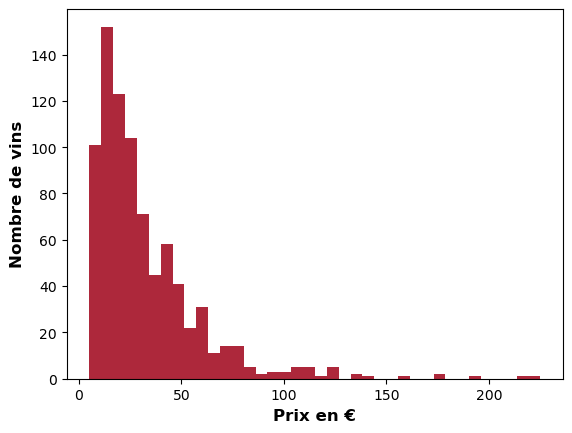

In [80]:
# histogram all product prices in erp file
plt.hist(erp['price'], bins=nb_bins, color=col)
plt.xlabel('Prix en €', fontweight='bold', fontsize='12')
plt.ylabel('Nombre de vins', fontweight='bold', fontsize='12')

### La distribution des prix des vins ne suit visiblement pas une loi Normale, donc l'utilisation du Z-score n'est pas pertinente ici. Nous utiliserons donc un box plot pour trouver les outliers dans la distribution des prix.

Text(0.5, 0, 'Prix en €')

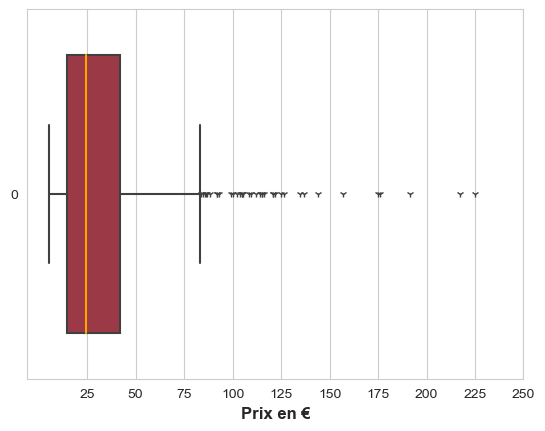

In [81]:
# box plot all product prices in erp file
sns.set_style('whitegrid')
sns.boxplot(data=erp['price'], flierprops={"marker": "1"}, medianprops={"color" : "orange"},
            orient="h", width=0.75, color=col)
plt.xticks([25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.xlabel('Prix en €', fontweight='bold', fontsize=12)

In [82]:
# calculate value of top whisker
top_whisker = Q3 + IQ*1.5
print("Valeur de la moustache haute:", top_whisker, "€")

Valeur de la moustache haute: 83.1 €


In [83]:
# List outliers
erp_outliers = erp.loc[(erp['price'] > top_whisker)]
print(erp_outliers.shape[0], "vins ont un prix supérieur à la moustache haute dans la table erp. Liste:")
erp_outliers

37 vins ont un prix supérieur à la moustache haute dans la table erp. Liste:


,product_id_erp,onsale_web,price,stock_quantity,stock_status
19,4055,False,86.1,0,outofstock
66,4115,True,100.0,11,instock
68,4132,True,88.4,5,instock
208,4352,True,225.0,0,outofstock
210,4355,True,126.5,2,instock
214,4359,True,85.6,0,outofstock
227,4402,True,176.0,8,instock
228,4404,True,108.5,2,instock
230,4406,True,157.0,3,instock
231,4407,True,104.0,6,instock


### En l'absence d'informations plus détaillées sur les types de vins, il est impossible de déterminer si les prix de ces vins "outliers" sont des valeurs atypiques (vins haut-de-gamme par exemple) ou aberrantes (telles qu'auraient pu en créér des erreurs de saisie, par exemple).
### Les vins concernés ont donc tous été conservés dans l'analyse, aucun critère discriminant n'étant disponible.